# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city #might be cities?
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | brookings
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | gbadolite
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | turkestan
Processing Record 13 of Set 1 | i-n-salah
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | vorkuta
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | isangel
Processing Record

Processing Record 41 of Set 4 | tolanaro
Processing Record 42 of Set 4 | lambton shores
City not found. Skipping...
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | al bawiti
Processing Record 46 of Set 4 | gao
Processing Record 47 of Set 4 | holualoa
Processing Record 48 of Set 4 | tomatlan
Processing Record 49 of Set 4 | kodinsk
Processing Record 0 of Set 5 | port alfred
Processing Record 1 of Set 5 | arenapolis
Processing Record 2 of Set 5 | abeche
Processing Record 3 of Set 5 | kingsbridge
Processing Record 4 of Set 5 | ondjiva
Processing Record 5 of Set 5 | xinyuan
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | murrells inlet
Processing Record 9 of Set 5 | burang
Processing Record 10 of Set 5 | tanjung pandan
Processing Record 11 of Set 5 | remire-montjoly
Processing Record 12 of Set 5 | baharly
Processing Record 13 of Set 5 | masaka
Processing Record 

Processing Record 29 of Set 8 | nova sintra
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | titao
Processing Record 32 of Set 8 | kabare
Processing Record 33 of Set 8 | puerto leguizamo
Processing Record 34 of Set 8 | primero de mayo
Processing Record 35 of Set 8 | modi'in makkabbim re'ut
City not found. Skipping...
Processing Record 36 of Set 8 | al hasakah
Processing Record 37 of Set 8 | spas-klepiki
Processing Record 38 of Set 8 | flying fish cove
Processing Record 39 of Set 8 | turan
Processing Record 40 of Set 8 | enid
Processing Record 41 of Set 8 | kerema
Processing Record 42 of Set 8 | san antonio de pale
Processing Record 43 of Set 8 | mabaruma
Processing Record 44 of Set 8 | mvomero
Processing Record 45 of Set 8 | treasure island
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | kapa'a
Processing Record 48 of Set 8 | xiongzhou
Processing Record 49 of Set 8 | belozersk
Processing Record 0 of Set 9 | piti village
Processing Record

Processing Record 20 of Set 12 | dyer
Processing Record 21 of Set 12 | camocim
Processing Record 22 of Set 12 | xishan
Processing Record 23 of Set 12 | keflavik
Processing Record 24 of Set 12 | roberval
Processing Record 25 of Set 12 | meybod
Processing Record 26 of Set 12 | ataq
Processing Record 27 of Set 12 | nantong
Processing Record 28 of Set 12 | santa terezinha
Processing Record 29 of Set 12 | vallenar
Processing Record 30 of Set 12 | pathalgaon
Processing Record 31 of Set 12 | mariel
Processing Record 32 of Set 12 | horta
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,267.95,97,100,4.68,RU,1682359545
1,kingston,17.9970,-76.7936,303.84,67,28,1.34,JM,1682359356
2,avarua,-21.2078,-159.7750,296.18,83,20,3.09,CK,1682359546
3,happy valley-goose bay,53.3168,-60.3315,283.32,53,20,3.09,CA,1682359546
4,udachny,66.4167,112.4000,259.18,100,50,1.59,RU,1682359546


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,267.95,97,100,4.68,RU,1682359545
1,kingston,17.9970,-76.7936,303.84,67,28,1.34,JM,1682359356
2,avarua,-21.2078,-159.7750,296.18,83,20,3.09,CK,1682359546
3,happy valley-goose bay,53.3168,-60.3315,283.32,53,20,3.09,CA,1682359546
4,udachny,66.4167,112.4000,259.18,100,50,1.59,RU,1682359546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

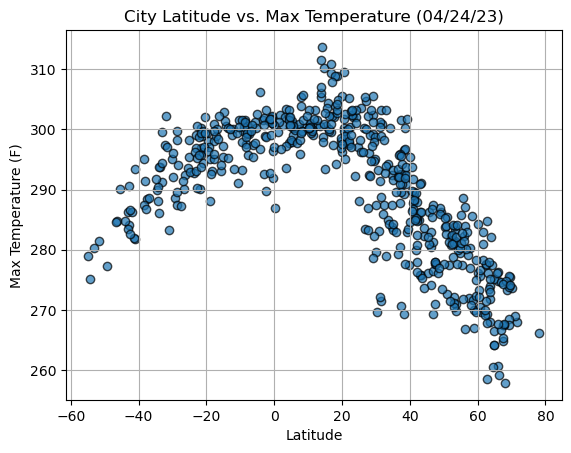

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, 
            marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

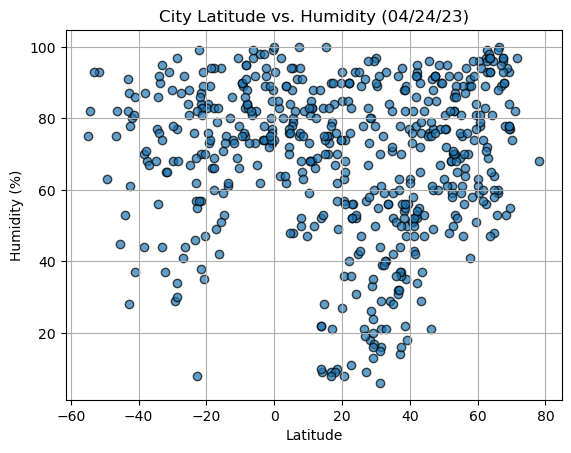

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

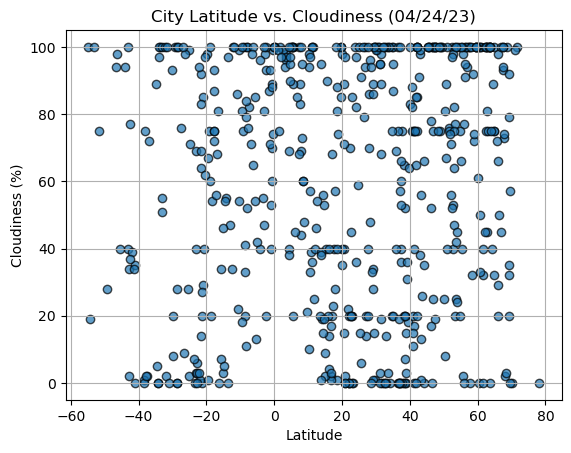

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

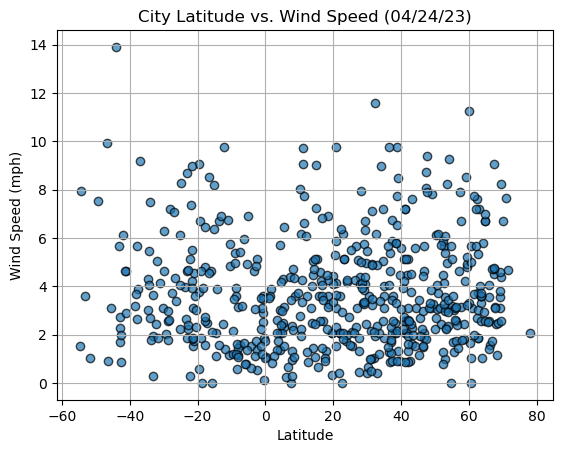

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
# Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
# Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()



In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,267.95,97,100,4.68,RU,1682359545
1,kingston,17.9970,-76.7936,303.84,67,28,1.34,JM,1682359356
3,happy valley-goose bay,53.3168,-60.3315,283.32,53,20,3.09,CA,1682359546
4,udachny,66.4167,112.4000,259.18,100,50,1.59,RU,1682359546
5,brookings,44.3114,-96.7984,282.34,47,0,3.09,US,1682359547


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,296.18,83,20,3.09,CK,1682359546
10,ushuaia,-54.8000,-68.3000,278.96,75,100,1.54,AR,1682359483
13,lebu,-37.6167,-73.6500,288.47,68,2,3.90,CL,1682359549
14,adamstown,-25.0660,-130.1015,298.30,88,99,6.11,PN,1682359549
15,grytviken,-54.2811,-36.5092,275.17,82,19,7.96,GS,1682359550


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8559736680794442


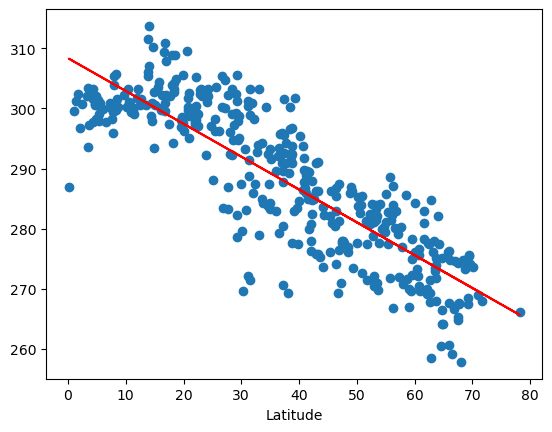

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))
plt.show()

The r-squared is: 0.7670198985591606


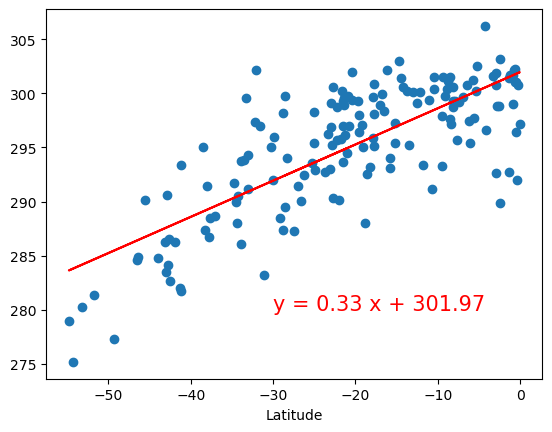

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Based on these linear regression plots above, for the northern hemisphere there is a very strong negative correlation between temperature and latitude.This means that for the northern hemisphere, the higher the latitude, the lower the average temperatures tend to be. For the southern hemisphere, there is a strong positive correlation between temperature and latitude. This means that the higher the latitude in the southern hemisphere, the higher the average temperatures tend to be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18016179330011997


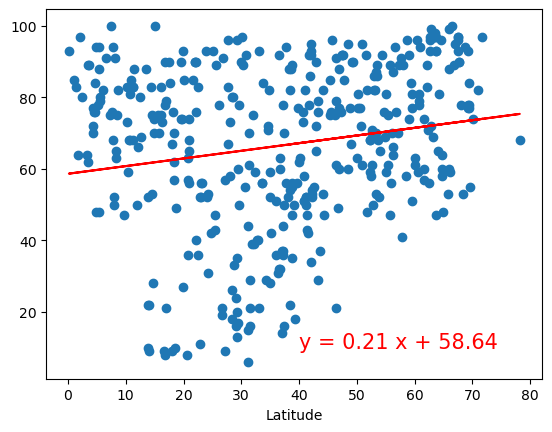

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))
plt.show()

The r-squared is: 0.23579152872061074


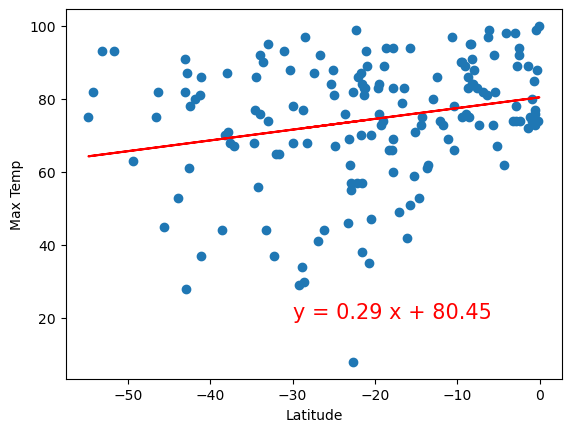

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,20))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the regression plots above, we see that there is a very weak to no positive correlation between humidity and latitude in the nothern hemisphere. For the southern hemisphere, there is low positive correlation between the latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07509239839141821


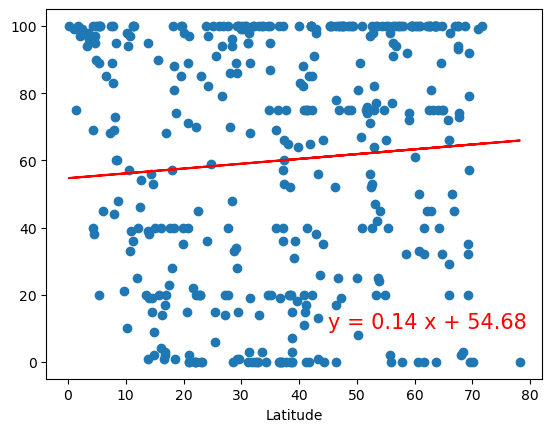

<function matplotlib.pyplot.show(close=None, block=None)>

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (45,10))
plt.show

The r-squared is: 0.19266504457783926


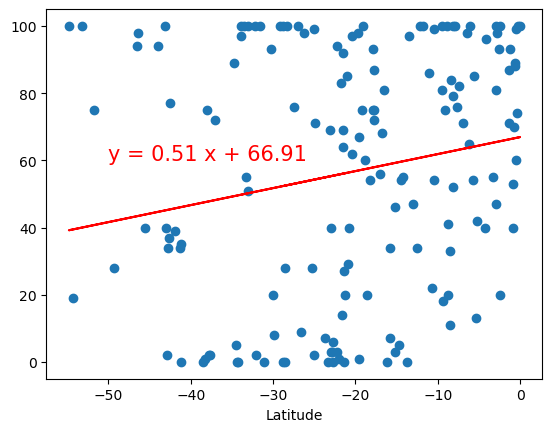

<function matplotlib.pyplot.show(close=None, block=None)>

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,60))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the above plots, we see that there is no or very very little positive correlation between latitude and cloudiness in both the nothern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1183982636207696


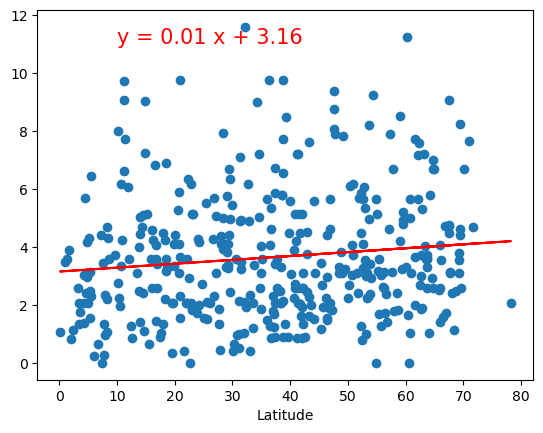

In [114]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (10,11))
plt.show()

The r-squared is: -0.22764483590238796


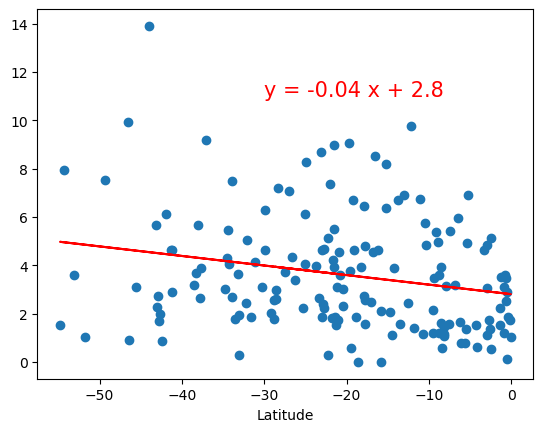

In [115]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,11))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In the plots above, we see there is no or very little positive correlation between latitude and wind speed in the northern hemisphere. In the southern hemisphere, there is very little negative correlation between latitude and windspeed. 